In [21]:
import tensorflow as tf
import numpy as np
(_, _), (test_data, test_target) = tf.keras.datasets.mnist.load_data()

In [22]:
#print("The shape of test_data is {}".format(test_data.shape))
#print("The shape of test_data is {}".format(test_target.shape))

In [23]:
data = test_data.reshape(test_data.shape[0], -1)
#print("The shape of data is {}".format(data.shape))

In [24]:
target = test_target

In [25]:
#test_data[0,:]

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import mglearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score

np.random.seed(0)

# feature scaling
num_classes = 10

num_features = data.shape[1]
scaler = StandardScaler() 
scaler.fit(data)
X_scaled = scaler.transform(data)

In [27]:
kmeans = KMeans(n_clusters=num_classes, random_state=10) 
kmeans.fit(X_scaled)

#plt.figure(figsize=(8, 8))
#plt.gca().set_aspect("auto")
#plt.xlabel("First feature")
#plt.ylabel("Second feature")
#mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
#mglearn.discrete_scatter(\
#    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.arange(num_classes), markers='^', markeredgewidth=2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

Original shape: (10000, 784)
Reduced shape: (10000, 193)


Text(0, 0.5, 'Second principal component')

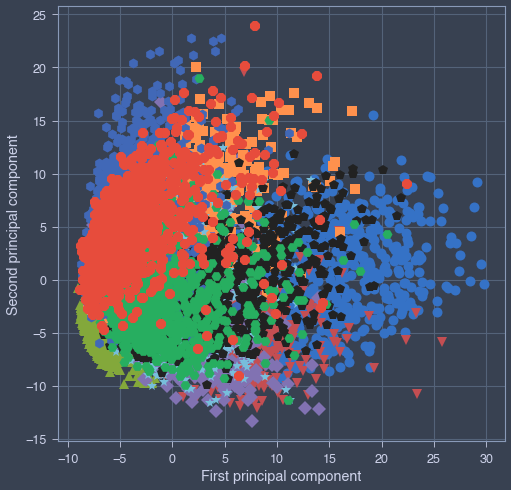

In [9]:
# Apply pca to scaled data

pca = PCA(n_components)
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_scaled_pca.shape)))
#print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

# plot the first and second PCs
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], target) 
#plt.legend(target_names, loc="best") 
plt.gca().set_aspect("auto")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")



In [20]:
pca_kmeans = KMeans(n_clusters=num_classes, random_state=10) 
pca_kmeans.fit(X_scaled_pca)

print("ARI of PCA assisted k-means is {}".format(adjusted_rand_score(target, pca_kmeans.labels_)))
print("ARI of k-means is {}".format(adjusted_rand_score(target, kmeans.labels_)))

ARI of PCA assisted k-means is 0.3267264606240375
ARI of k-means is 0.3242276888513661


In [17]:
pca_8 = PCA(n_components = 0.8)
pca_8.fit(X_scaled)
X_scaled_pca = pca_8.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_scaled_pca.shape)))

Original shape: (10000, 784)
Reduced shape: (10000, 116)


In [19]:
pca_kmeans = KMeans(n_clusters=num_classes, random_state=10) 
pca_kmeans.fit(X_scaled_pca)

print("ARI of PCA assisted k-means is {}".format(adjusted_rand_score(target, pca_kmeans.labels_)))
print("ARI of k-means is {}".format(adjusted_rand_score(target, kmeans.labels_)))

ARI of PCA assisted k-means is 0.3267264606240375
ARI of k-means is 0.3242276888513661


In [29]:
print("ARI of k-means is {}".format(adjusted_rand_score(target, kmeans.labels_)))
for i in np.arange(9):
    pca = PCA(n_components = ((i+1)/10))
    pca.fit(X_scaled)
    X_scaled_pca = pca.transform(X_scaled)
    pca_kmeans = KMeans(n_clusters=num_classes, random_state=10) 
    pca_kmeans.fit(X_scaled_pca)
    print("Reduced shape: {}".format(str(X_scaled_pca.shape)))
    print("ARI of PCA {} assisted k-means is {}".format((i+1)/10, adjusted_rand_score(target, pca_kmeans.labels_)))

ARI of k-means is 0.3242276888513661
Reduced shape: (10000, 2)
ARI of PCA 0.1 assisted k-means is 0.19526805411035597
Reduced shape: (10000, 5)
ARI of PCA 0.2 assisted k-means is 0.2990457473231366
Reduced shape: (10000, 11)
ARI of PCA 0.3 assisted k-means is 0.3234264219004058
Reduced shape: (10000, 19)
ARI of PCA 0.4 assisted k-means is 0.3181759655285994
Reduced shape: (10000, 32)
ARI of PCA 0.5 assisted k-means is 0.32530872025473323
Reduced shape: (10000, 50)
ARI of PCA 0.6 assisted k-means is 0.3224182409886362
Reduced shape: (10000, 75)
ARI of PCA 0.7 assisted k-means is 0.32443863846801213
Reduced shape: (10000, 116)
ARI of PCA 0.8 assisted k-means is 0.3267264606240375
Reduced shape: (10000, 193)
ARI of PCA 0.9 assisted k-means is 0.32788944161138733
